In [1]:
from core import Spectrum 

In [2]:
spectrum_1 = Spectrum()

spectrum_1.load_spectrum('ge_co_spec.txt')

Spectrum loaded from ge_co_spec.txt using delimiter=' '.


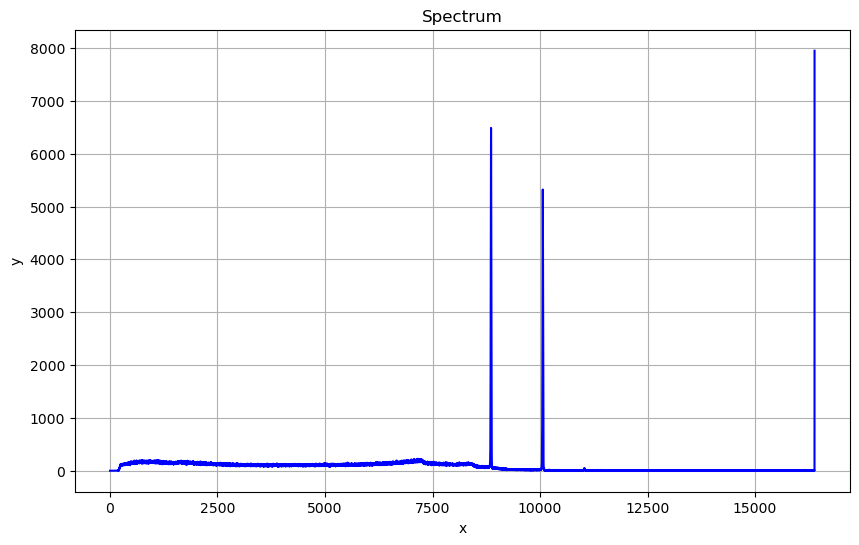

In [3]:
spectrum_1.plot()

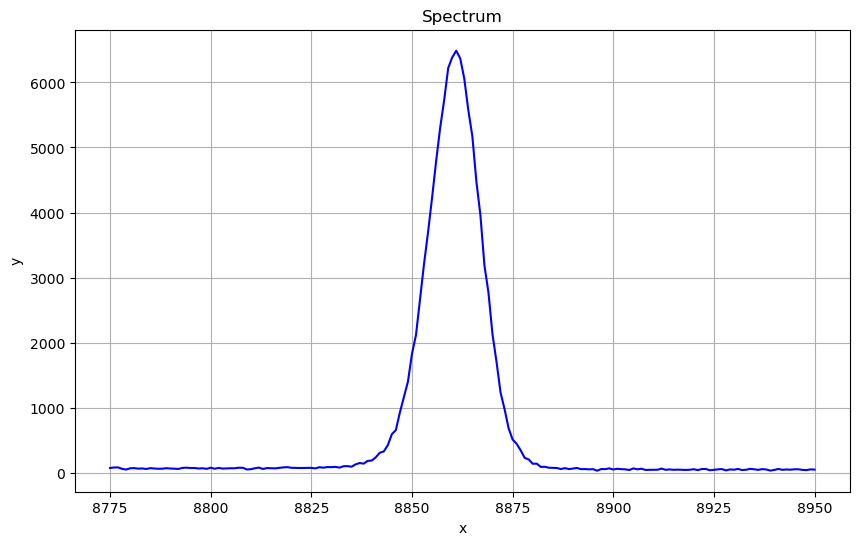

In [4]:
spectrum_1.plot(x_min=8775, x_max=8950)

In [5]:
spectrum_1.fit_peaks(
    x_min=8775,      
    x_max=8950,      
    peak_type='gaussian',
    n_peaks=1,
    bg_type='constant',
    bg_coeffs=[0], # initial background coefficients
    initial_params=[6000, 8860, 100]  # Initial parameters for the fit
)


c:\Users\bruno\spectrum_analyzer\src\spectrum_analyzer\core.py:210: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.fitted_peaks = pd.concat([self.fitted_peaks, fit_result.df], ignore_index=True)


  peak_id      type          amp          cen       wid      d_amp     d_cen     d_wid
0       1  gaussian  6349.297352  8860.598471  6.530299  30.061061  0.035701  0.035701

In [6]:
spectrum_1.fitted_peaks

,peak_id,type,amp,cen,wid,sigma,gamma,bg_type,bg_coeffs,errors,d_amp,d_cen,d_wid
0,1,gaussian,6349.297352,8860.598471,6.530299,NaN,NaN,constant,[0],NaN,30.061061,0.035701,0.035701


In [7]:
spectrum_1.remove_fitted_peak("1")

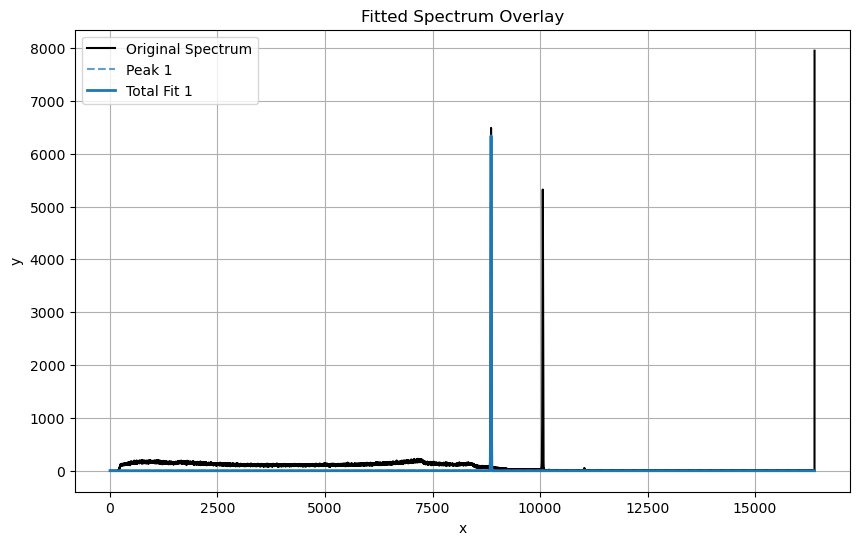

In [7]:
spectrum_1.plot_fit_overlay()